## Task 2
This notebook trains a **Machine Learning model** to predict used car prices.
### Steps Covered:
- Load & preprocess data
- Model selection using **PyCaret**
- **Hyperparameter tuning** for best performance
- **Model evaluation & visualization**
- **Experiment tracking with MLflow**
- **Saving the trained model**

In [1]:
# Import required libraries
import pandas as pd
import mlflow
import mlflow.sklearn
from pycaret.regression import *
import os

# Set up MLflow tracking
mlflow.set_tracking_uri("http://localhost:5000")  # Ensure MLflow server is running
mlflow.set_experiment("used_car_price_prediction")  # Create or use existing experiment


<Experiment: artifact_location='file:///C:/Users/jetpa/mlruns/1', creation_time=1740531447562, experiment_id='1', last_update_time=1740531447562, lifecycle_stage='active', name='used_car_price_prediction', tags={}>

## Load & Preprocess Data

In [2]:
# Load the cleaned dataset
df = pd.read_csv("../processed/cleaned_used_car_data.csv")

# Display dataset info
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5301 entries, 0 to 5300
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand_Model        5301 non-null   object 
 1   Location           5301 non-null   object 
 2   Year               5301 non-null   int64  
 3   Kilometers_Driven  5301 non-null   int64  
 4   Fuel_Type          5301 non-null   object 
 5   Transmission       5301 non-null   object 
 6   Owner_Type         5301 non-null   object 
 7   Mileage            5301 non-null   float64
 8   Engine             5301 non-null   float64
 9   Power              5301 non-null   float64
 10  Seats              5301 non-null   float64
 11  Price              5301 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 497.1+ KB


,Brand_Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,175000.0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,1250000.0
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,450000.0
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,600000.0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,1774000.0


## Initialize PyCaret & Preprocessing

In [3]:
# Initialize PyCaret Regression setup
reg = setup(data=df, target="Price", session_id=123, log_experiment=True, experiment_name="used_car_price_prediction")


,Description,Value
0,Session id,123
1,Target,Price
2,Target type,Regression
3,Original data shape,"(5301, 12)"
4,Transformed data shape,"(5301, 28)"
5,Transformed train set shape,"(3710, 28)"
6,Transformed test set shape,"(1591, 28)"
7,Numeric features,6
8,Categorical features,5
9,Preprocess,True


## Model Selection

In [4]:
# Compare models and choose the best one
best_model = compare_models()
print(best_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,108554.6578,38241506639.0774,195159.5005,0.7574,0.3001,0.2181,0.7750
xgboost,Extreme Gradient Boosting,115571.6320,41933013811.2000,204518.8875,0.7336,0.3277,0.2435,0.1820
lightgbm,Light Gradient Boosting Machine,119399.2372,43215236582.7969,207614.4829,0.7258,0.3409,0.2601,0.2850
lasso,Lasso Regression,142645.6630,43437967678.9829,208162.5002,0.7244,0.4120,0.3163,0.4490
lr,Linear Regression,142645.2344,43437761350.0402,208162.0368,0.7244,0.4120,0.3163,0.6670
ridge,Ridge Regression,142656.2065,43443880272.8437,208176.1209,0.7244,0.4120,0.3164,0.0350
llar,Lasso Least Angle Regression,142633.0924,43434484605.1725,208154.3146,0.7244,0.4121,0.3163,0.0360
lar,Least Angle Regression,142754.1878,43476781705.0100,208247.2318,0.7242,0.4089,0.3172,0.0370
br,Bayesian Ridge,142821.4705,43584498500.1023,208508.4318,0.7235,0.4189,0.3165,0.0400
et,Extra Trees Regressor,124430.5013,46530749346.2938,215381.9357,0.7048,0.3478,0.2674,0.2020


## Hyperparameter Tuning

In [5]:
# Tune the best model
tuned_model = tune_model(best_model)
print(tuned_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,116077.1672,41566060117.9801,203877.5616,0.7481,0.3439,0.2652
1,120798.2972,39514495351.3216,198782.5328,0.7464,0.3375,0.2591
2,108703.2227,38048009548.0995,195058.9899,0.7639,0.3215,0.2392
3,116271.3271,40241095070.8285,200601.8322,0.7302,0.3479,0.2677
4,110839.5242,31532128705.3342,177572.8828,0.7937,0.3119,0.2397
5,117227.3263,48948971890.9711,221244.1454,0.7196,0.2974,0.2020
6,113435.5863,39953951722.4254,199884.8462,0.7439,0.3415,0.2594
7,118472.3332,44209495696.7031,210260.5424,0.7029,0.3061,0.2250
8,117738.3032,41037054526.7765,202576.0463,0.7320,0.3325,0.2477


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


## Model Evaluation & Visualization

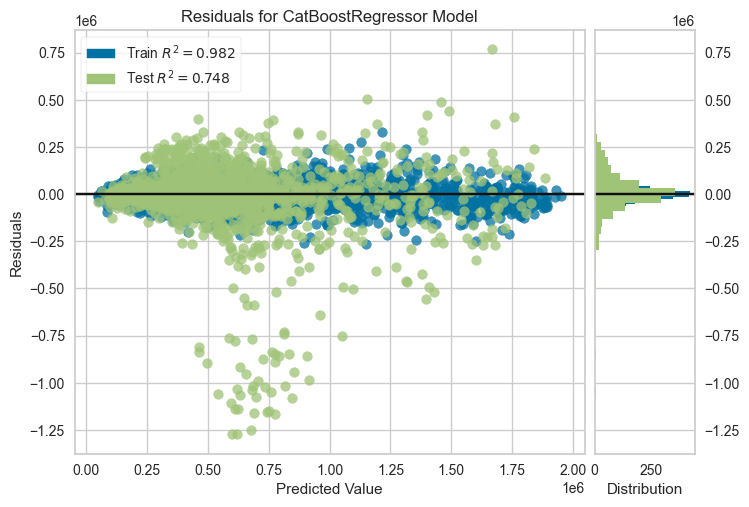

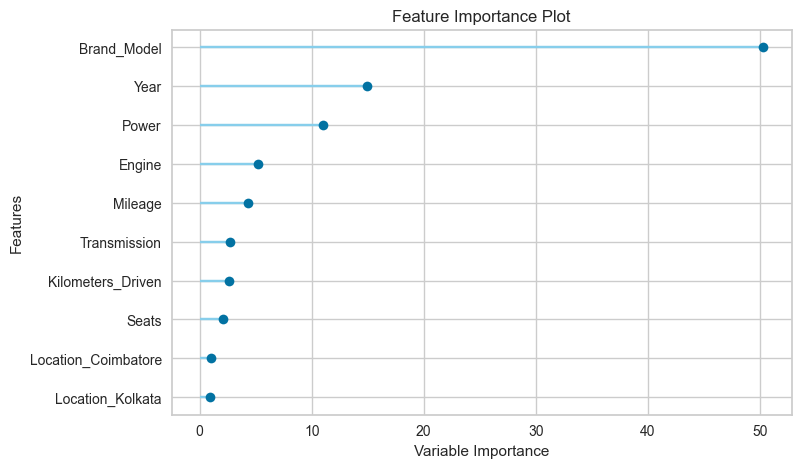

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [6]:
# Evaluate the model with visualizations
plot_model(tuned_model, plot="residuals")  # Residual plot
plot_model(tuned_model, plot="feature")  # Feature importance
evaluate_model(tuned_model)  # Interactive model evaluation


## Experiment Tracking with MLflow

In [ ]:
from pycaret.regression import pull

# Forcefully end all active MLflow runs
while mlflow.active_run():
    mlflow.end_run()

# Extract the R² score directly from PyCaret’s latest trained model results
r2_score_value = pull()["R2"].iloc[0]  # Get the best model's R² score

# Start a new MLflow run
with mlflow.start_run():
    mlflow.log_param("Best Model", str(best_model))  # Log the model used
    mlflow.log_metric("R² Score", r2_score_value)  # Log the already calculated R² score

    # Save trained model in MLflow
    mlflow.sklearn.log_model(tuned_model, "used_car_price_model")

print("Model logged in MLflow!")

2025/02/26 09:39:19 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\jetpa\AppData\Local\Temp\tmphymhmpkf\model\model.pkl, flavor: sklearn), fall back to return ['scikit-learn==1.4.2', 'cloudpickle==2.2.1']. Set logging level to DEBUG to see the full traceback.


ModuleNotFoundError: No module named 'distutils._modified'

## Save the Final Model

In [9]:
# Save the trained model for later deployment
save_model(tuned_model, "../models/final_used_car_model")
print("Final model saved successfully!")

Transformation Pipeline and Model Successfully Saved
Final model saved successfully!
